# Práctica 3

# **NOTA:**
### Se trabajó con un archivo excel un poco editado, ya que existían campos vacíos que no permitían a mi programa avanzar

+ ## En esta primera parte se importan librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

+ ## Se visualizan los datos del archivo y se conoce su estructura

In [2]:
file = "Olympic Athletes.xlsx"

In [3]:
file_pd = pd.read_excel(file)

In [4]:
file_pd.head()

,Athlete,Age,Country,Year,Closing Ceremony Date,Sport,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


In [5]:
columnas = file_pd.columns
datos = file_pd[columnas]
print(type(datos))
print(columnas)

<class 'pandas.core.frame.DataFrame'>
Index(['Athlete', 'Age', 'Country', 'Year', 'Closing Ceremony Date', 'Sport',
       'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals'],
      dtype='object')


In [6]:
for columna in columnas:    
    print(file_pd[columna].values)

['Michael Phelps' 'Michael Phelps' 'Michael Phelps' ... 'Wietse van Alten'
 'Sandra Wagner-Sachse' 'Rod White']
[23 19 27 ... 21 31 23]
['United States' 'United States' 'United States' ... 'Netherlands'
 'Germany' 'United States']
[2008 2004 2012 ... 2000 2000 2000]
['2008-08-24T00:00:00.000000000' '2004-08-29T00:00:00.000000000'
 '2012-08-12T00:00:00.000000000' ... '2000-10-01T00:00:00.000000000'
 '2000-10-01T00:00:00.000000000' '2000-10-01T00:00:00.000000000']
['Swimming' 'Swimming' 'Swimming' ... 'Archery' 'Archery' 'Archery']
[8 6 4 ... 0 0 0]
[0 0 2 ... 0 0 0]
[0 2 0 ... 1 1 1]
[8 8 6 ... 1 1 1]


In [7]:
registro = file_pd.iloc[1428] #usé este comando para visualizar los registros, me ayudó a visualizar campos vacíos o caracteres que no me servían
print(registro)

Athlete                                    a
Age                                        0
Country                               Brazil
Year                                    2012
Closing Ceremony Date    2012-08-12 00:00:00
Sport                             Volleyball
Gold Medals                                0
Silver Medals                              1
Bronze Medals                              0
Total Medals                               1
Name: 1428, dtype: object


In [8]:
print(len(file_pd))
print(len(file_pd.columns))

8618
10


+ ## Importart SQLite3 y comenzar a vaciar el dataset en una tabla de la base de datos

In [9]:
import sqlite3

In [10]:
conexion = sqlite3.connect('olimpiadas.db')

In [11]:
c = conexion.cursor()

In [12]:
c.execute("""
CREATE TABLE IF NOT EXISTS datos
    (id integer PRIMARY KEY AUTOINCREMENT,
    athlete text,
    age integer,
    country text,
    year text,
    closing_date text,
    sport text,
    gold_medals integer,
    silver_medals integer,
    bronze_medals integer,
    total_medals integer
    )""")

In [13]:
print(type(int(registro[1])))

<class 'int'>


In [14]:
for i in range(0,len(file_pd)):
    registro = file_pd.iloc[i]    
    #print(registro)
    #print(i)
    #c.execute("INSERT INTO datos ( id, athlete, age, country, year, closing_date, sport, gold_medals, silver_medals, bronze_medals, total_medals) values (NULL,  ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", [datos.Athlete[i], int(datos.Age[i]), str(registro[2]), int(registro[3]), str(registro[4]), str(registro[5]), int(registro[6]), int(registro[7]), int(registro[8]), int(registro[9])])
    c.execute("INSERT INTO datos VALUES(NULL, '"+registro[0]+"', "+str(registro[1])+", '"+registro[2]+"', "+str(registro[3])+",'"+str(registro[4])+"','"+registro[5]+"', "+str(registro[6])+", "+str(registro[7])+", "+str(registro[8])+", "+str(registro[9])+")")

OperationalError: database is locked

In [ ]:
conexion.commit

In [ ]:
#c.execute('DROP TABLE datos')
#conexion.commit

In [ ]:
c.execute('SELECT * FROM datos')
#impresion de registros
registros = c.fetchall()
for ciclo in registros:
    print(ciclo)

+ ## Usar pandas para crear un dataset con los datos que nos interesan 

In [15]:
new_file = file_pd[['Country', 'Gold Medals']]
new_file.head()

,Country,Gold Medals
0,United States,8
1,United States,6
2,United States,4
3,United States,1
4,Russia,2


+ ## Obtener la lista de los paises y las medallas de cada uno

In [16]:
lista_paises = []
for i in range(0, len(new_file)):
    
    pais = new_file['Country'][i]
    
    if pais not in lista_paises:
        lista_paises.append(pais)

print(lista_paises)

['United States', 'Russia', 'Australia', 'Canada', 'Norway', 'China', 'Zimbabwe', 'Netherlands', 'South Korea', 'Croatia', 'France', 'Japan', 'Hungary', 'Germany', 'Poland', 'South Africa', 'Sweden', 'Ukraine', 'Italy', 'Czech Republic', 'Austria', 'Finland', 'Romania', 'Great Britain', 'Jamaica', 'Singapore', 'Belarus', 'Chile', 'Spain', 'Tunisia', 'Brazil', 'Slovakia', 'Costa Rica', 'Bulgaria', 'Switzerland', 'New Zealand', 'Estonia', 'Kenya', 'Ethiopia', 'Trinidad and Tobago', 'Turkey', 'Morocco', 'Bahamas', 'Slovenia', 'Armenia', 'Azerbaijan', 'India', 'Puerto Rico', 'Egypt', 'Kazakhstan', 'Iran', 'Georgia', 'Lithuania', 'Cuba', 'Colombia', 'Mongolia', 'Uzbekistan', 'North Korea', 'Tajikistan', 'Kyrgyzstan', 'Greece', 'Macedonia', 'Moldova', 'Chinese Taipei', 'Indonesia', 'Thailand', 'Vietnam', 'Latvia', 'Venezuela', 'Mexico', 'Nigeria', 'Qatar', 'Serbia', 'Serbia and Montenegro', 'Hong Kong', 'Denmark', 'Portugal', 'Argentina', 'Afghanistan', 'Gabon', 'Dominican Republic', 'Belgiu

In [17]:
num_medallas=[]
#new_file['Country'== 'Uganda']
for pais in lista_paises:
    #print(pais)
    num_medallas.append(new_file[new_file['Country']==pais ]['Gold Medals'].sum())
print(num_medallas)

[552, 234, 163, 168, 97, 234, 2, 101, 110, 35, 108, 57, 77, 223, 20, 10, 57, 31, 86, 14, 36, 11, 57, 124, 24, 0, 17, 3, 19, 2, 46, 10, 0, 8, 21, 18, 6, 11, 13, 1, 9, 2, 11, 5, 0, 6, 1, 0, 1, 13, 10, 6, 5, 57, 2, 2, 5, 6, 0, 0, 12, 0, 0, 2, 5, 6, 0, 3, 1, 19, 6, 0, 1, 11, 0, 46, 1, 49, 0, 0, 3, 2, 0, 1, 0, 1, 2, 0, 0, 0, 20, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]


In [18]:
medallasXpais = {'country':lista_paises, 'gold_medals':num_medallas}

+ ## Usar el resultado para obtener los 3 con mas medallas de oro

In [19]:
mxp = pd.DataFrame(data=medallasXpais)
mxp_ordered = mxp.sort_values('gold_medals', ascending=False).head(4)
mxp_ordered

,country,gold_medals
0,United States,552
5,China,234
1,Russia,234
13,Germany,223


+ ## Graficar con matplot lib
Como 2 países están empatados, por eso grafico 4

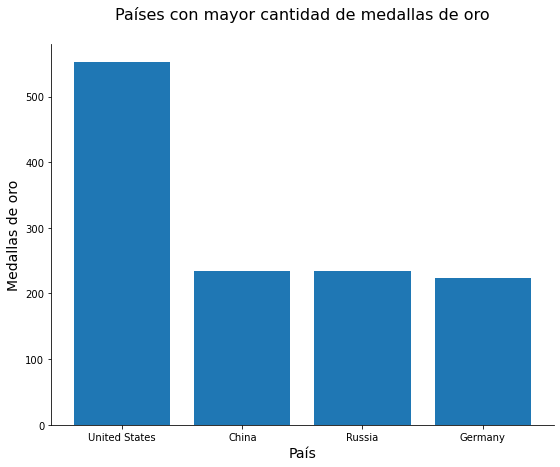

In [20]:

plt.figure(figsize=(9,7))
plt.title('Países con mayor cantidad de medallas de oro',size=16,pad=25)

plt.bar(mxp_ordered.country,mxp_ordered.gold_medals )
plt.ylabel("Medallas de oro", size=14)
plt.xlabel("País", size=14)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.grid(False)
plt.show()